In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
sns.set()

In [2]:
raw_data = pd.read_excel('C:\\Users\\user\\Desktop\\Glamworld Data\\COD2019.xlsx')

In [3]:
raw_data.head()

,Sr. #,Consignment #,Cust Ref #,Booking Date,Consignee,Origin,Destination,Weight,Payment Period,Delivery Status,COD Amount,Shipping CHG.
0,1.0,7.751523e+11,Drraahxahid,"17, Dec, 19",Moomal Sarah,RWP,THATTA,0.5,22_Dec_to_31_Dec_2019,Return To Vendor,--,--
1,2.0,7.751523e+11,mix order,"19, Dec, 19",Wasif Mumtaz,RWP,BAHAWALNAGAR,0.5,22_Dec_to_31_Dec_2019,Delivered,1200,--
2,3.0,7.751523e+11,mix order,"19, Dec, 19",Tuba Shaheen,RWP,FAISALABAD,0.5,22_Dec_to_31_Dec_2019,Return To Vendor,--,--
3,4.0,7.751523e+11,mix order,"19, Dec, 19",Kinza khushboo,RWP,RAWALPINDI,0.5,22_Dec_to_31_Dec_2019,Delivered,200,--
4,5.0,7.751523e+11,Paint Tints Pack,"21, Dec, 19",Syeda iqra,RWP,KARACHI,0.5,22_Dec_to_31_Dec_2019,Return To Shipper,--,--


In [4]:
raw_data.describe(include='all')

,Sr. #,Consignment #,Cust Ref #,Booking Date,Consignee,Origin,Destination,Weight,Payment Period,Delivery Status,COD Amount,Shipping CHG.
count,1540.000000,1.540000e+03,1447,1540,1540,1540,1540,1540.000000,1540,1541,1541,1541.0
unique,NaN,NaN,757,185,1079,1,109,NaN,48,6,294,15.0
top,NaN,NaN,mix order,"08, Jan, 19",Amna,RWP,KARACHI,NaN,22_Dec_to_31_Dec_2019,Delivered,--,160.0
freq,NaN,NaN,339,41,11,1540,341,NaN,115,1346,194,552.0
mean,22.835065,7.751523e+11,NaN,NaN,NaN,NaN,NaN,0.507312,NaN,NaN,NaN,NaN
std,20.085459,4.377393e+02,NaN,NaN,NaN,NaN,NaN,0.112348,NaN,NaN,NaN,NaN
min,1.000000,7.751523e+11,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
25%,9.000000,7.751523e+11,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
50%,18.000000,7.751523e+11,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
75%,30.000000,7.751523e+11,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN


In [5]:
raw_data.isnull().sum()

Sr. #               1
Consignment #       1
Cust Ref #         94
Booking Date        1
Consignee           1
Origin              1
Destination         1
Weight              1
Payment Period      1
Delivery Status     0
COD Amount          0
Shipping CHG.       0
dtype: int64

In [6]:
data_no_mv = raw_data.dropna(axis=0)

In [7]:
data_no_mv.isnull().sum()

Sr. #              0
Consignment #      0
Cust Ref #         0
Booking Date       0
Consignee          0
Origin             0
Destination        0
Weight             0
Payment Period     0
Delivery Status    0
COD Amount         0
Shipping CHG.      0
dtype: int64

In [8]:
data = raw_data[['Destination','COD Amount', 'Delivery Status']]
data.head()

,Destination,COD Amount,Delivery Status
0,THATTA,--,Return To Vendor
1,BAHAWALNAGAR,1200,Delivered
2,FAISALABAD,--,Return To Vendor
3,RAWALPINDI,200,Delivered
4,KARACHI,--,Return To Shipper


In [9]:
data.shape

(1541, 3)

In [10]:
data['Destination'].shape

(1541,)

In [11]:
data['COD Amount'].shape

(1541,)

In [12]:
data['Delivery Status'].shape

(1541,)

In [13]:
data_no_mv = data.dropna(axis=0)

In [14]:
data_no_mv

,Destination,COD Amount,Delivery Status
0,THATTA,--,Return To Vendor
1,BAHAWALNAGAR,1200,Delivered
2,FAISALABAD,--,Return To Vendor
3,RAWALPINDI,200,Delivered
4,KARACHI,--,Return To Shipper
5,FAISALABAD,1200,Delivered
6,PETARO,--,Return To Vendor
7,RAHIMYARKHAN,--,Return To Origin
8,SHAHDARA,--,Return To Vendor
9,SARGODAH,1330,Delivered


In [15]:
data['Delivery Status'].unique()

array(['Return To Vendor', 'Delivered', 'Return To Shipper',
       'Return To Origin', 'InProcess', 'Total'], dtype=object)

In [18]:
data = data.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [19]:
le = LabelEncoder()
le.fit(data['Destination'])
print(list(le.classes_))
data['Destination_Num'] = le.transform(data['Destination'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]


In [20]:
data.head()

,Destination,COD Amount,Delivery Status,Destination_Num
0,105,0,4,105
1,5,19,0,5
2,19,0,4,19
3,83,93,0,83
4,34,0,3,34


In [21]:
data = data.drop(['Destination_Num'],axis=1)

In [35]:
data['COD Amount'] = data_no_mv['COD Amount']

In [47]:
data_for_clustering = pd.read_excel('C:\\Users\\user\\Desktop\\Glamworld Data\\GlamworldClusters1.xlsx')

In [48]:
data_for_clustering

,Destination,COD Amount,Delivery Status
0,105,0,4
1,5,1200,0
2,19,0,4
3,83,200,0
4,34,0,3
5,19,1200,0
6,74,0,4
7,81,0,2
8,92,0,4
9,90,1330,0


In [49]:
data_for_clustering.describe(include='all')

,Destination,COD Amount,Delivery Status
count,1541.000000,1541.000000,1541.000000
mean,58.127839,1447.608696,0.212200
std,29.992097,1305.568515,0.662351
min,0.000000,0.000000,0.000000
25%,34.000000,590.000000,0.000000
50%,59.000000,1350.000000,0.000000
75%,92.000000,2000.000000,0.000000
max,109.000000,10600.000000,5.000000


In [50]:
data1 = data_for_clustering.copy()

In [56]:
kmeans = KMeans(n_clusters=4,random_state=21)
results = kmeans.fit(data1)
identified_clusters = results.fit_predict(data1)
identified_clusters

array([2, 0, 2, ..., 0, 1, 2])

In [57]:
data_with_clusters = data1.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters['Destination Names'] = data_no_mv['Destination']
data_with_clusters['Delivery Status N'] = data_no_mv['Delivery Status']
data_with_clusters

,Destination,COD Amount,Delivery Status,Clusters,Destination Names,Delivery Status N
0,105,0,4,2,THATTA,Return To Vendor
1,5,1200,0,0,BAHAWALNAGAR,Delivered
2,19,0,4,2,FAISALABAD,Return To Vendor
3,83,200,0,2,RAWALPINDI,Delivered
4,34,0,3,2,KARACHI,Return To Shipper
5,19,1200,0,0,FAISALABAD,Delivered
6,74,0,4,2,PETARO,Return To Vendor
7,81,0,2,2,RAHIMYARKHAN,Return To Origin
8,92,0,4,2,SHAHDARA,Return To Vendor
9,90,1330,0,0,SARGODAH,Delivered


In [26]:
data_with_clusters['Destination Names'] = data_no_mv['Destination'] 

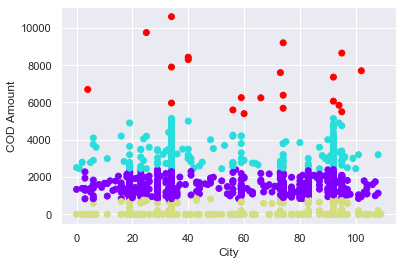

In [58]:
plt.scatter(data_with_clusters['Destination'],data_with_clusters['COD Amount'],c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlabel('City')
plt.ylabel('COD Amount')
plt.show()

In [54]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(data1)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[2626330030.469825,
 1150701494.5068033,
 592362806.9868364,
 329608446.0230222,
 194793370.65214184,
 131151702.22260237,
 92167441.93784463,
 65329505.393562466,
 53288797.92457302,
 44227193.44307287]

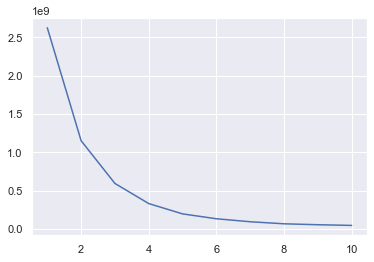

In [55]:
number_cluster = range(1,11)
plt.plot(number_cluster,wcss)

In [59]:
data_with_clusters.to_excel(r'C:\Users\user\Desktop\Glamworld Data\GlamworldClustersf.xlsx',index=False)